In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## A Tour of BigQuery DataFrame Visualization Tools

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/googleapis/python-bigquery-dataframes/blob/main/notebooks/visualization/visualization.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks/visualization/visualization.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks/visualization/visualization.ipynb">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW1gvOovVlbZAIZylUtf5Iu8-693qS1w5NJw&s" alt="BQ logo" width="35">
      Open in BQ Studio
    </a>
  </td>
</table>

# Before you begin

## Set up your project ID and region

This step makes sure that you will access the target dataset with the correct authentication profile.

In [1]:
PROJECT_ID = "bigframes-dev"  # @param {type:"string"}
REGION = "US"  # @param {type: "string"}

In [2]:
import bigframes.pandas as bpd

bpd.options.bigquery.project = PROJECT_ID
bpd.options.bigquery.location = REGION

You can also turn on the partial ordering mode for faster data processing.

In [3]:
bpd.options.bigquery.ordering_mode = 'partial'

# Histogram

You will use the penguins public dataset for this example. 

In [4]:
penguins = bpd.read_gbq('bigquery-public-data.ml_datasets.penguins')
penguins.peek()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie Penguin (Pygoscelis adeliae),Dream,36.6,18.4,184.0,3475.0,FEMALE
1,Adelie Penguin (Pygoscelis adeliae),Dream,39.8,19.1,184.0,4650.0,MALE
2,Adelie Penguin (Pygoscelis adeliae),Dream,40.9,18.9,184.0,3900.0,MALE
3,Chinstrap penguin (Pygoscelis antarctica),Dream,46.5,17.9,192.0,3500.0,FEMALE
4,Adelie Penguin (Pygoscelis adeliae),Dream,37.3,16.8,192.0,3000.0,FEMALE


You want to draw a histogram about the distribution of culmen lengths.

<Axes: ylabel='Frequency'>

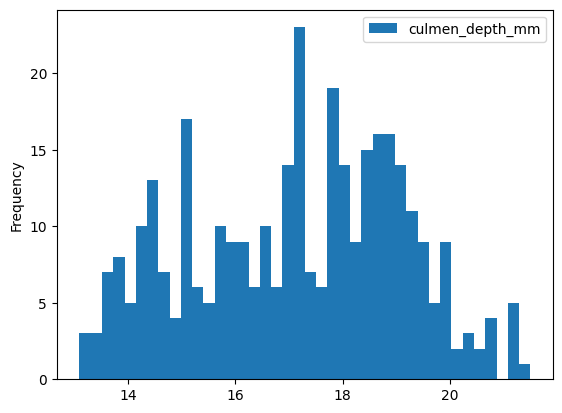

In [5]:
penguins['culmen_depth_mm'].plot.hist(bins=40)

When drawing histograms, BigQuery DataFrames bucketizes the data remotely and retrieves the summarized data. It then retrieves the data into a local Pandas Dataframe for plotting.

# Line Chart

In this example you will use the NOAA public dataset.

In [11]:
noaa_surface = bpd.read_gbq("bigquery-public-data.noaa_gsod.gsod2021")
noaa_surface.peek()

,stn,wban,date,year,mo,da,temp,count_temp,dewp,count_dewp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,010014,99999,2021-02-09,2021,02,09,23.9,4,3.2,4,...,*,0.0,I,999.9,0,0,0,0,0,0
1,010014,99999,2021-03-19,2021,03,19,41.9,4,31.1,4,...,*,0.0,I,999.9,0,0,0,0,0,0
2,010030,99999,2021-02-23,2021,02,23,31.5,4,30.1,4,...,<NA>,0.19,E,999.9,0,1,1,0,0,0
3,010070,99999,2021-02-21,2021,02,21,24.7,4,15.7,4,...,<NA>,0.0,I,999.9,0,0,0,0,0,0
4,010070,99999,2021-01-28,2021,01,28,4.1,4,-5.4,4,...,<NA>,0.0,I,999.9,0,0,0,0,0,0


You are going to plot a line chart of temperatures by date. The `plot.line()` method that samples and retrieves the dataset. The default sampling count is 1000, and you can override that value with the `sampling_n` parameter. You also need to sort the X-axis (`'date'`) first:

/usr/local/google/home/sycai/src/python-bigquery-dataframes/bigframes/core/array_value.py:263: AmbiguousWindowWarning: Window ordering may be ambiguous, this can cause unstable results.
  warnings.warn(msg, category=bfe.AmbiguousWindowWarning)
/usr/local/google/home/sycai/src/python-bigquery-dataframes/bigframes/core/array_value.py:239: AmbiguousWindowWarning: Window ordering may be ambiguous, this can cause unstable results.
  warnings.warn(msg, bfe.AmbiguousWindowWarning)


<Axes: xlabel='date'>

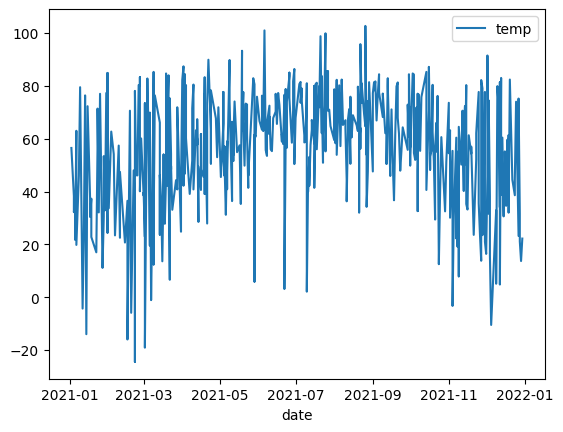

In [26]:
noaa_surface.sort_values('date').plot.line(x='date', y='temp', sampling_n=500)

# Area Chart

An area chart is similar to a line chart. Their main difference is that in an area chart, the space between the plotted line and the X-axis is filled with color. The BigQuery DataFrame uses sampling to retrieve data and plot them locally.

In [36]:
usa_names = bpd.read_gbq("bigquery-public-data.usa_names.usa_1910_2013")
usa_names.peek()

,state,gender,year,name,number
0,AL,F,1910,Cora,61
1,AL,F,1910,Anna,74
2,AR,F,1910,Willie,132
3,CO,F,1910,Anna,42
4,FL,F,1910,Louise,70


You are going to find the trend of the popularities of three names in US history:

<Axes: xlabel='year'>

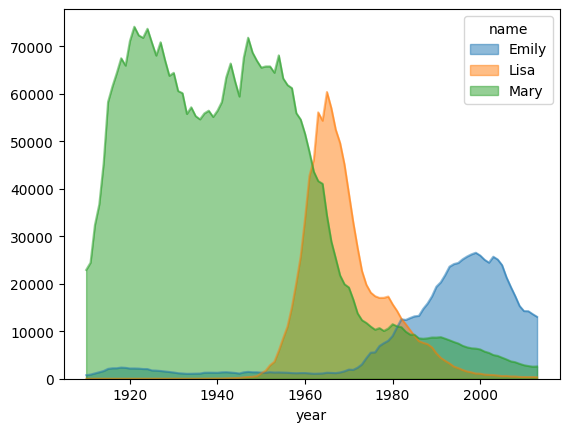

In [76]:

name_counts = usa_names[usa_names['name'].isin(('Mary', 'Emily', 'Lisa'))].groupby(('year', 'name'))['number'].sum()
name_counts = name_counts.unstack(level=1)

name_counts.plot.area(stacked=False, alpha=0.5)

# Bar Chart

Bar Charts are suitable for analyzing categorical data. For example, you are going to check the sex distribution of the penguin data:

<Axes: xlabel='sex'>

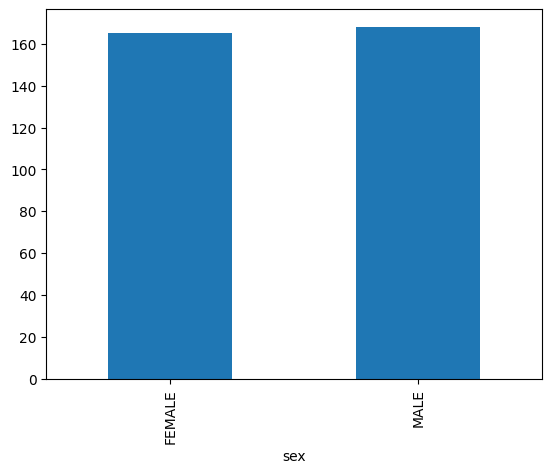

In [89]:
penguin_count_by_sex = penguins[penguins['sex'].isin(("MALE", "FEMALE"))].groupby('sex')['species'].count()
penguin_count_by_sex.plot.bar()

# Scatter Plot

In this example, you will explore the relationship between NYC taxi fares and trip distances.

In [99]:
taxi_trips = bpd.read_gbq('bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2021').dropna()
taxi_trips.peek()

/usr/local/google/home/sycai/src/python-bigquery-dataframes/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3667: UserWarning: Reading cached table from 2025-04-29 20:38:38.471483+00:00 to avoid
incompatibilies with previous reads of this table. To read the latest
version, set `use_cache=False` or close the current session with
Session.close() or bigframes.pandas.close_session().
  exec(code_obj, self.user_global_ns, self.user_ns)


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,airport_fee,total_amount,pickup_location_id,dropoff_location_id,data_file_year,data_file_month
0,2,2021-09-05 13:26:52+00:00,2021-09-05 13:27:35+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2021,9
1,2,2021-07-07 13:20:36+00:00,2021-07-07 13:22:56+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2021,7
2,2,2021-07-26 10:02:18+00:00,2021-07-26 10:05:34+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,7,193,2021,7
3,2,2021-05-17 14:50:58+00:00,2021-05-17 14:52:43+00:00,1,0E-9,1.0,N,1,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,193,193,2021,5
4,1,2021-12-04 15:07:54+00:00,2021-12-04 15:08:17+00:00,0,0.100000000,1.0,N,3,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,0E-9,158,158,2021,12


/usr/local/google/home/sycai/src/python-bigquery-dataframes/bigframes/core/array_value.py:263: AmbiguousWindowWarning: Window ordering may be ambiguous, this can cause unstable results.
  warnings.warn(msg, category=bfe.AmbiguousWindowWarning)
/usr/local/google/home/sycai/src/python-bigquery-dataframes/bigframes/core/array_value.py:239: AmbiguousWindowWarning: Window ordering may be ambiguous, this can cause unstable results.
  warnings.warn(msg, bfe.AmbiguousWindowWarning)


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

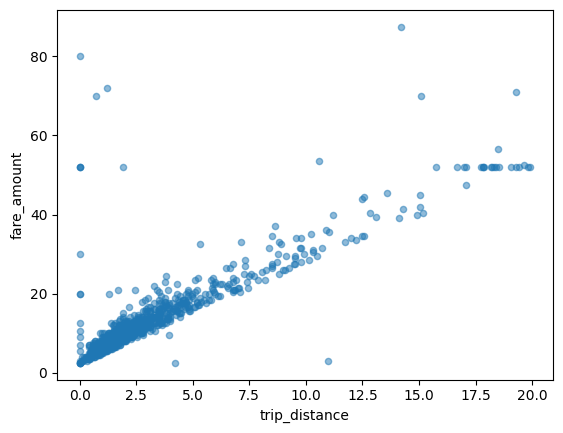

In [105]:
taxi_trips = taxi_trips[taxi_trips['trip_distance'] < 20]
taxi_trips = taxi_trips[taxi_trips['fare_amount'] >0]
taxi_trips.sort_values('pickup_datetime').plot.scatter(x='trip_distance', y='fare_amount', alpha=0.5)

# Creating multiple graphs with `subplots` parameter

When you invoke `plot` accessor over dataframes, BigQuery DataFrame tries to draw all eligible graphs into a single graph:

<Axes: ylabel='Frequency'>

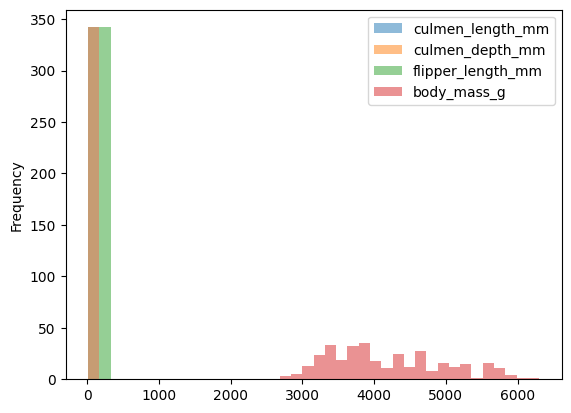

In [22]:
penguins.plot.hist(alpha=0.5, bins=40)

You can set the `subplots` parameter to `True` such that each eligible column is visualized on a separate graph:

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

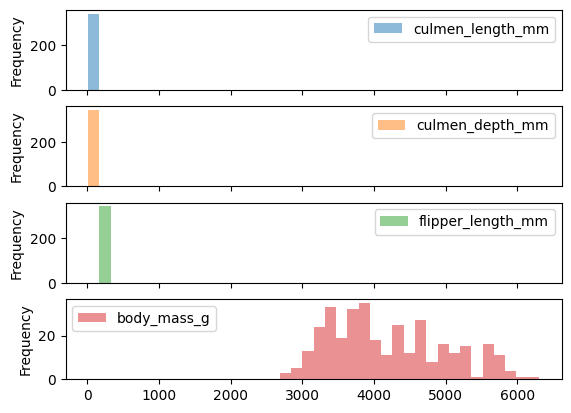

In [23]:
penguins.plot.hist(alpha=0.5, subplots=True, bins=40)

You noticed that all these graphs has the same scale for their X-axes, which is not ideal. One way to solve this problem is to use `StandardScaler` from the `ml` package to normalize your data:

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

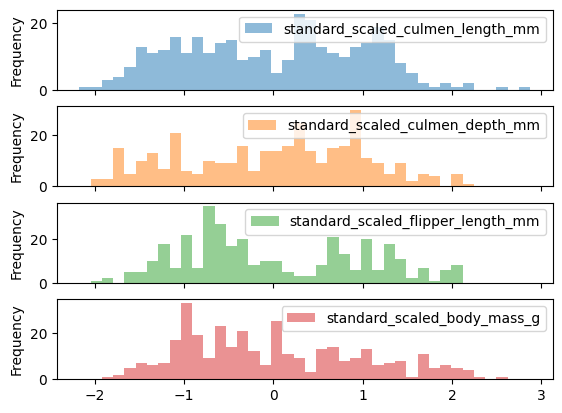

In [21]:
from bigframes.ml.preprocessing import StandardScaler
import numpy as np

numerical_penguins = penguins.select_dtypes(np.number)

standardized_penguins = StandardScaler().fit_transform(numerical_penguins)
standardized_penguins.plot.hist(alpha=0.5, subplots=True, bins=40)